## ARG-metal analysis composition
Chemical analysis for tetracyclines, ionophores, metals, and Diflubenzuron (an insecticide present in manure)

### Challenge
Determine if the prevalence of any of the ARGs analyzed correlate positively in the presence of any of the chemical contaminants, not just tetracyclines.

### Solution
First visualize the level of similarity between the full dataset using MDS. MDS computes distances between each point and places each object (ARG/metal) into a 2 dimensional space such that the between object distances are preserved as well as possible.

Regression via simple classifier: Use a simple regression algorithm to predict the metal content by using the ARG content.

### Results
* ARGs-Metal distribution shows that there are not a high dependency of metals to ARGs. Except for ereB and ermB that are closer to the metals. 
* Mon is closer to some ARGs including ermF and blaVEB
* Most of ARGs do not correlate with metals
* Sample similarity plots shows that metals are not a good indicator to discriminate sample locations. However, ARGs show some patterns.


In [1]:
import numpy as np
import pandas as pd

from sklearn import manifold
from sklearn.preprocessing import scale

# import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotl4y.figure_factory as ff
init_notebook_mode(connected=True)

import graphviz 

In [2]:
# load data
data = pd.read_excel('data2.xlsx')
data = data.set_index('samples')
data = data.iloc[:, 1:]
transposed_data = data.transpose()
print("Input table format: \n")
print(data.iloc[0:5, 0:10])

Input table format: 

               blaVEB  aac(6')-lb      aada2       ermB       ermF       sul1  \
samples                                                                         
Post        13.022490   14.019723  13.996887  11.241327  10.153572  14.530170   
Post        12.070597   14.193917  12.857082  10.415167  10.199983  13.203723   
Post        14.654437   15.935220  13.068150  11.232950  10.364953  14.082283   
Raw manure   0.000000    0.000000   0.000000  15.992767  17.368592  15.118422   
Raw manure  13.482918   15.152823  13.060190  14.393533  14.055253  10.917743   

                 sul2       tetO       tetA      tetM  
samples                                                
Post        11.450680  10.786182   0.000000  7.414557  
Post        11.872960  11.312847   0.000000  8.692132  
Post        11.382553  11.219360   0.000000  6.835187  
Raw manure  10.612183   8.960433  14.741727  9.892863  
Raw manure   9.537623  11.820833  14.607240  9.721173  


In [3]:
# useful functions
def _trace(data=[], Y=[], labels=[], size=15):
    trace = []
    for ix,i in enumerate(data.index):
        trace.append(
            go.Scatter(
                x=Y[ix:ix+1, 0],
                y=Y[ix:ix+1, 1],
                mode='markers',
                name=i,
                marker = dict(
                    size=size,
                    line=dict(width=1),
                    symbol= labels[ix]
                )
            )
        )
    return trace

## ARG-Metals 
In this section we are analyzing the correlation of metals and ARGs. Each dot in the figure corresponds to a metal or ARG. 

In [4]:
# normalize data
x = scale(transposed_data, axis=1, with_mean=True, with_std=True, copy=True)

In [5]:
# compute the tSNE and visualize
rmodel = manifold.MDS(n_components=2, max_iter=10000, eps=1e-9, random_state=0)
Y = rmodel.fit_transform(x)
print("original shape:", x.shape)
print("reduced dataset: ", Y.shape)

original shape: (18, 33)
reduced dataset:  (18, 2)


In [6]:
# Build the visualization trace
# useful functions
def _shape(ix):
    if ix < 12:
        return "circle"
    if ix == 12:
        return "circle-open"
    if ix > 12:
        return "diamond-open"

labels = [_shape(ix) for ix,i in enumerate(transposed_data.index)]
trace0 = _trace(data=transposed_data, Y=Y, labels=labels)

In [7]:
# visualize
layout0 = dict(
    title="ARGs-Metals MDS visualization",
    xaxis=dict(zeroline=False),
    yaxis=dict(zeroline=False),
)

fig0 = dict(data=trace0, layout=layout0)
iplot(fig0, filename='basic-scatter-0')

## Sample distribution ARGs+Metals
In this section we are analyzing the correlation between the different samples. Each dot in the visualization represents a particular sample.

In [8]:
# normalize data
x = scale(data, axis=0, with_mean=True, with_std=True, copy=True)

In [9]:
# compute the MDS and visualize
rmodel = manifold.MDS(n_components=2, max_iter=10000, eps=1e-9, random_state=0)
Y = rmodel.fit_transform(x)
print("original shape:", x.shape)
print("reduced dataset: ", Y.shape)

original shape: (33, 18)
reduced dataset:  (33, 2)


In [10]:
# Build the visualization trace
key_labels = {i: ix for ix,i in enumerate(set([i.split('_')[0] for i in data.index]))}
labels =  [key_labels[i.split('_')[0]] for i in data.index]
trace1 = _trace(data=data, Y=Y, labels=labels)

In [11]:
# visualize
layout1 = dict(
    title="Samples MDS visualization ARGs+Metals",
    xaxis=dict(zeroline=False),
    yaxis=dict(zeroline=False),
)

fig1 = dict(data=trace1, layout=layout1)
iplot(fig1, filename='basic-scatter-1')

## Sample distribution only ARGs
In this section we are analyzing the correlation between the different samples. Each dot in the visualization represents a particular sample.

In [12]:
# normalize data
x = scale(data.iloc[0:, 1:13], axis=0, with_mean=True, with_std=True, copy=True)

In [13]:
# compute the MDS and visualize
rmodel = manifold.MDS(n_components=2, max_iter=10000, eps=1e-9, random_state=0)
Y = rmodel.fit_transform(x)
print("original shape:", x.shape)
print("reduced dataset: ", Y.shape)

original shape: (33, 12)
reduced dataset:  (33, 2)


In [14]:
# Build the visualization trace
key_labels = {i: ix for ix,i in enumerate(set([i.split('_')[0] for i in data.index]))}
labels =  [key_labels[i.split('_')[0]] for i in data.index]
trace2 = _trace(data=data, Y=Y, labels=labels)

In [15]:
# visualize
layout2 = dict(
    title="Samples MDS visualization ARGs",
    xaxis=dict(zeroline=False),
    yaxis=dict(zeroline=False),
)

fig2 = dict(data=trace2, layout=layout2)
iplot(fig2, filename='basic-scatter-2')

## Sample distribution only Metals
In this section we are analyzing the correlation between the different samples. Each dot in the visualization represents a particular sample.

In [16]:
# normalize data
x = scale(data.iloc[0:, 13:19], axis=0, with_mean=True, with_std=True, copy=True)

In [17]:
# compute the MDS and visualize
rmodel = manifold.MDS(n_components=2, max_iter=10000, eps=1e-9, random_state=0)
Y = rmodel.fit_transform(x)
print("original shape:", x.shape)
print("reduced dataset: ", Y.shape)

original shape: (33, 5)
reduced dataset:  (33, 2)


In [18]:
# Build the visualization trace
key_labels = {i: ix for ix,i in enumerate(set([i.split('_')[0] for i in data.index]))}
labels =  [key_labels[i.split('_')[0]] for i in data.index]
trace3 = _trace(data=data, Y=Y, labels=labels)

In [19]:
# visualize
layout3 = dict(
    title="Samples MDS visualization Metals",
    xaxis=dict(zeroline=False),
    yaxis=dict(zeroline=False),
)

fig3 = dict(data=trace3, layout=layout3)
iplot(fig3, filename='basic-scatter-3')

# Machine learning Analysis
In this section we apply machinle learning to determine if there are patterns between the ARGs and the compound's level

In [20]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import ExtraTreesClassifier as ETC
import lightgbm as lgb

import importlib
import functions

importlib.reload(functions)

def to_categorical(value, low=0, medium=50):
    if value<=low: return "Low"
    elif low < value <= medium: return "Low"
    elif value > medium: return "High"
        

def get_dataset(data=[], _class="Fe", low=50, medium=500):
    dataset = data.iloc[0:, 12:]
    dts = data[[_class]].copy()[_class]
    labels =[ to_categorical(i,low=low,medium=medium) for i in dts]
    _labels = list(set(labels))
    _labels.sort()
    return [dataset, labels, _labels, dts]

# 

def ml_model(dataset=[], labels=[], method='tree'):
    # train tree classifier
    labels = np.array(labels) 
    if method == "LGBM":
        labels[labels == 'Low'] = 0
        labels[labels == 'High'] = 1
    
    x_train, x_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.3)
    if method == 'tree':
        model = tree.DecisionTreeClassifier()
        y_pred = model.fit(x_train, y_train).predict(x_test)
    # functions.plot_confusion_matrix(cnf_matrix, classes=_labels, title="Prediction", normalize=False)
        
    if method == 'bayes':
#         print('performing bayes ...')
        model = MultinomialNB()
        y_pred = model.fit(x_train, y_train).predict(x_test)
    
    if method == 'RFC':
        model = RFC(random_state = 0)
        y_pred = model.fit(x_train, y_train).predict(x_test)
    
    if method == "LGBM":
        # create dataset for lightgbm
        lgb_train = lgb.Dataset(x_train, y_train)
        lgb_eval = lgb.Dataset(x_test, y_test, reference=lgb_train)
        
        # display(x_train)
        
        num_train, num_feature = x_train.shape
        
        params = {
            'boosting_type': 'gbdt',
            'objective': 'binary',
            'metric': 'binary_error',
            'num_leaves': 21,
            'learning_rate': 0.05,
            'feature_fraction': 0.9,
            'bagging_fraction': 0.8,
            'bagging_freq': 5,
            'verbose': -1,
            'min_data': 1,
            'min_data_bin': 1
        }
        
        feature_name = np.array(['feature_' + str(col) for col in range(num_feature)])
        # print(feature_name)
        
        model = lgb.train(
            params,
            lgb_train,
            num_boost_round=50,
            valid_sets=lgb_eval
        )
        
        y_pred = np.array(model.predict(x_test))
        y_pred[y_pred > 0.5] = '1'
        y_pred[y_pred < 0.5] = '0'
        y_pred = [str(int(i)) for i in y_pred.tolist()]
#         display(y_pred)
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred )
    
    # print(report)
    return [model, report]

def ml_visualize(model=[], dataset=[], _labels=[]):
    dot_data = tree.export_graphviz(
        model, 
        out_file=None, 
        feature_names=list(dataset),  
        class_names=_labels,  
        filled=True, 
        rounded=True,  
        special_characters=True,
        leaves_parallel=True,
    )

    graph = graphviz.Source(dot_data)
    return graph

def ml_process(low=50, medium=500, _class="Fe", data=data, method="tree"):
    dataset, labels, _labels, values = get_dataset(data=data, _class=_class, low=low, medium=medium)
    [model, performance] = ml_model(dataset=dataset, labels=labels, method=method)
    graph = []
    if method == "tree":
        graph = ml_visualize(model=model, dataset=dataset, _labels=_labels)
    return [model, graph, performance]

def ml_performance(low=50, medium=500, _class="Fe", data=data, method="tree"):
    precisions = []
    recalls = []
    f1scores = []
    supports = []
    models = []
    for _ in range(100):
        model, graph, performance = ml_process(low=low, medium=medium, _class=_class, data=data, method=method)
        precision, recall, f1score, support = [i.split() for i in performance.split('\n') if len(i.split())>0][-1][-4:]
        precisions.append(precision)
        recalls.append(recall)
        f1scores.append(f1score)
        supports.append(support)
        models.append(model)
    
    print(performance)
    traces = [go.Box(y=i[0], name=i[1]) for i in [[precisions,'precision'], [recalls, 'recall'], [f1scores,'f1score'] ]]
    return [traces, graph, models]

def importances(models=[], data=[]):
    features = {}
    dataset = data.iloc[0:, 12:]
    for model in models:
        importances = model.feature_importances_
        std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
        indices = np.argsort(importances)[::-1]
        __importances = {i[1]:i[0] for i in list(zip(model.feature_importances_, list(dataset)))}
        
        for f in __importances:
            try:
                features[f].append(__importances[f])
            except:
                features[f] = [__importances[f]]
    return features

In [21]:
from jenks import jenks

def classify(value, breaks):
    for i in range(1, len(breaks)):
        if value < breaks[i]:
            return i
    return len(breaks) - 1

def goodness_of_variance_fit(array, classes):
    # get the break points
    classes = jenks(array, classes)

    # do the actual classification
    classified = np.array([classify(i, classes) for i in array])

    # max value of zones
    maxz = max(classified)

    # nested list of zone indices
    zone_indices = [[idx for idx, val in enumerate(classified) if zone + 1 == val] for zone in range(maxz)]

    # sum of squared deviations from array mean
    sdam = np.sum((array - array.mean()) ** 2)

    # sorted polygon stats
    array_sort = [np.array([array[index] for index in zone]) for zone in zone_indices]

    # sum of squared deviations of class means
    sdcm = sum([np.sum((classified - classified.mean()) ** 2) for classified in array_sort])

    # goodness of variance fit
    gvf = (sdam - sdcm) / sdam

    return gvf

def htb(data):
    """
    Function to compute the head/tail breaks algorithm on an array of data.
    Params:
    -------
    data (list): array of data to be split by htb.
    Returns:
    --------
    outp (list): list of data representing a list of break points.
    """
    # test input
    assert data, "Input must not be empty."
    assert all(isinstance(_, int) or isinstance(_, float) for _ in data), "All input values must be numeric."

    outp = []  # array of break points

    def htb_inner(data):
        """
        Inner ht breaks function for recursively computing the break points.
        """
        data_length = float(len(data))
        data_mean = sum(data) / data_length
        head = [_ for _ in data if _ > data_mean]
        outp.append(data_mean)
        while len(head) > 1 and len(head) / data_length < 0.40:
            return htb_inner(head)
    htb_inner(data)
    return outp

## Distribution of concentrations
This plot shows the distribution of the concentrations for each one of the compounds and the correlation (network) among metals and ARGs

### Composition Distribution
The box-plot figure shows the distribution of the composition values in the different samples. This graph is useful to determine the levels for the classification algorithm (low/high). 

### Network Analysis
The pairwise correlation was computed for the whole dataset. Then, ARGs-metals-compounds are linked if they have at leas a 0.3 correlation. Circular layout shows the relationship of metals (blue nodes) with ARGs (red nodes). 

None

['blaVEB', "aac(6')-lb", 'aada2', 'ermB', 'ermF', 'sul1', 'sul2', 'tetO', 'tetA', 'tetM', 'int2', 'int1', 'Total Tetracyclines (ng/g)', 'Lasalocid (LAS)', 'Monensin (MON)', 'Fe', 'Cu', 'Diflubenzuron Larvicide concentration (µg/kg)']


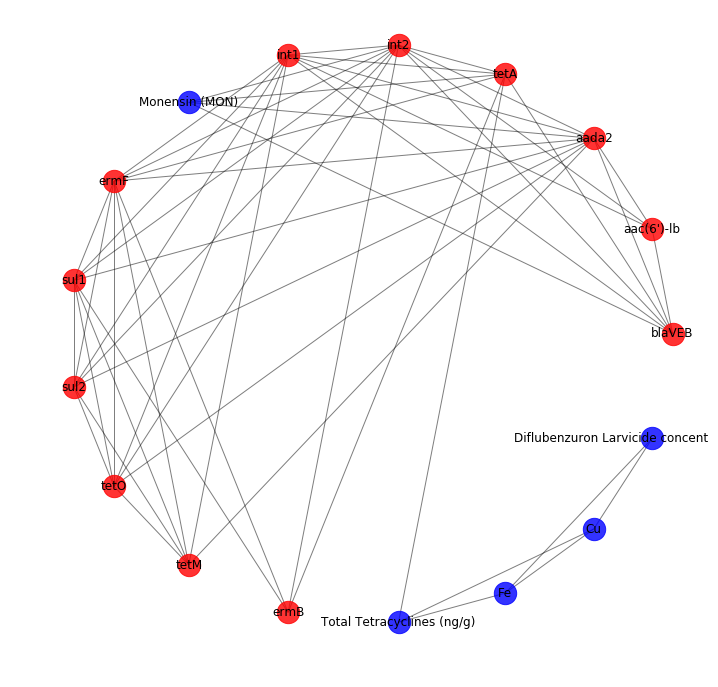

In [22]:
traces = [go.Box(y=data[i], name=i) for i in data]
display(iplot(traces))

import networkx as nx
import matplotlib.pyplot as plt

plt.figure(1,figsize=(12,12)) 

_corr = data.corr()
adm = np.matrix(_corr)

# display(_corr)

print(list(data))

G = nx.Graph()

cutoff = 0.3
nodes=[]
for ix,i in enumerate(_corr):
    items = _corr[i][ix+1:]
    for jx,j in enumerate(items.index):
        if items[jx] >= cutoff: 
            G.add_edge(i, j, weight=items[jx])
            nodes.append(i)
            nodes.append(j)

pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos,
                       nodelist=[i for i in list(data)[:12] if i in nodes],
                       node_color='r',
                       node_size=500,
                       alpha=0.8)

nx.draw_networkx_nodes(G, pos,
                       nodelist=[i for i in list(data)[12:] if i in nodes],
                       node_color='b',
                       node_size=500,
                       alpha=0.8)

nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, {i:i for i in G.nodes()}, font_size=12)

plt.axis('off')
plt.show()

### Classification with trees 
This section shows the classification performance of using the args as features and the discrete levels of the compounds as labels. levels are defined based on the composition distribution of each compound. 

In [23]:
import warnings
warnings.filterwarnings("ignore")

# classifier
_classes = list(data)[:12]

for _class in _classes:  
    display('########## Analyzing: '+_class+" ###########")
    x = data[_class]
    gvf = 0.0
    nclasses = 2
    while gvf < .8:
        gvf = goodness_of_variance_fit(x, nclasses)
        nclasses += 1

    _top = jenks(x, 2)
    display("# Optimized cutoff to build two classes: ", _top )
    # display(_top)
    # display( htb( sorted(x) ) )

    fgi = dict(data=ff.create_distplot([data[_class]], [_class]))

    
    display(iplot(fgi, filename="fgi"))

    low = medium = _top[1]

    traces, graph, rmodel = ml_performance(low=low, medium=medium, _class=_class, data=data, method="RFC")
    display("Random Forest Classifier")
    display(iplot(traces))

    display("ARGs importances")
    _importances = importances(models=rmodel, data=data)
    traces = [go.Box(y=_importances[i], name=i) for i in _importances]
    display(iplot(traces))


'########## Analyzing: blaVEB ###########'

'# Optimized cutoff to build two classes: '

[0.0, 0.0, 15.861914]

None

             precision    recall  f1-score   support

       High       0.62      1.00      0.77         5
        Low       1.00      0.40      0.57         5

avg / total       0.81      0.70      0.67        10



'Random Forest Classifier'

None

'ARGs importances'

None

"########## Analyzing: aac(6')-lb ###########"

'# Optimized cutoff to build two classes: '

[0.0, 0.0, 15.93522]

None

             precision    recall  f1-score   support

       High       1.00      0.50      0.67         2
        Low       0.89      1.00      0.94         8

avg / total       0.91      0.90      0.89        10



'Random Forest Classifier'

None

'ARGs importances'

None

'########## Analyzing: aada2 ###########'

'# Optimized cutoff to build two classes: '

[0.0, 0.0, 18.238613]

None

             precision    recall  f1-score   support

       High       0.70      1.00      0.82         7
        Low       0.00      0.00      0.00         3

avg / total       0.49      0.70      0.58        10



'Random Forest Classifier'

None

'ARGs importances'

None

'########## Analyzing: ermB ###########'

'# Optimized cutoff to build two classes: '

[0.0, 0.0, 17.64041]

None

             precision    recall  f1-score   support

       High       0.90      1.00      0.95         9
        Low       0.00      0.00      0.00         1

avg / total       0.81      0.90      0.85        10



'Random Forest Classifier'

None

'ARGs importances'

None

'########## Analyzing: ermF ###########'

'# Optimized cutoff to build two classes: '

[0.0, 0.0, 17.965178]

None

             precision    recall  f1-score   support

       High       0.90      1.00      0.95         9
        Low       0.00      0.00      0.00         1

avg / total       0.81      0.90      0.85        10



'Random Forest Classifier'

None

'ARGs importances'

None

'########## Analyzing: sul1 ###########'

'# Optimized cutoff to build two classes: '

[0.0, 0.0, 15.12217]

None

             precision    recall  f1-score   support

       High       0.90      1.00      0.95         9
        Low       0.00      0.00      0.00         1

avg / total       0.81      0.90      0.85        10



'Random Forest Classifier'

None

'ARGs importances'

None

'########## Analyzing: sul2 ###########'

'# Optimized cutoff to build two classes: '

[0.0, 0.0, 16.81371]

None

             precision    recall  f1-score   support

       High       0.80      1.00      0.89         8
        Low       0.00      0.00      0.00         2

avg / total       0.64      0.80      0.71        10



'Random Forest Classifier'

None

'ARGs importances'

None

'########## Analyzing: tetO ###########'

'# Optimized cutoff to build two classes: '

[0.0, 0.0, 16.737156]

None

             precision    recall  f1-score   support

       High       0.70      1.00      0.82         7
        Low       0.00      0.00      0.00         3

avg / total       0.49      0.70      0.58        10



'Random Forest Classifier'

None

'ARGs importances'

None

'########## Analyzing: tetA ###########'

'# Optimized cutoff to build two classes: '

[0.0, 0.0, 15.953255]

None

             precision    recall  f1-score   support

       High       0.40      1.00      0.57         4
        Low       0.00      0.00      0.00         6

avg / total       0.16      0.40      0.23        10



'Random Forest Classifier'

None

'ARGs importances'

None

'########## Analyzing: tetM ###########'

'# Optimized cutoff to build two classes: '

[0.0, 0.0, 17.580223]

None

             precision    recall  f1-score   support

       High       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        10



'Random Forest Classifier'

None

'ARGs importances'

None

'########## Analyzing: int2 ###########'

'# Optimized cutoff to build two classes: '

[0.0, 0.0, 19.391052]

None

             precision    recall  f1-score   support

       High       1.00      0.90      0.95        10
        Low       0.00      0.00      0.00         0

avg / total       1.00      0.90      0.95        10



'Random Forest Classifier'

None

'ARGs importances'

None

'########## Analyzing: int1 ###########'

'# Optimized cutoff to build two classes: '

[0.0, 0.0, 19.293364]

None

             precision    recall  f1-score   support

       High       0.67      0.86      0.75         7
        Low       0.00      0.00      0.00         3

avg / total       0.47      0.60      0.53        10



'Random Forest Classifier'

None

'ARGs importances'

None

In [24]:
# low = medium = _top[1]

# traces, graph, bmodel = ml_performance(low=low, medium=medium, _class=_class, data=data, method="bayes")
# print("Bayes Classifier")
# display(iplot(traces))

# traces, graph, tmodel = ml_performance(low=low, medium=medium, _class=_class, data=data, method="tree")
# print("Tree Classifier")
# display(iplot(traces))
# display(graph)

# display(_importances)
# display(traces)


# traces, graph = ml_performance(low=low, medium=medium, _class=_class, data=data, method="LGBM")
# print("GDB Classifier")
# display(iplot(traces))

## Classification of treatment based on ARG abundance
In this test we are assuming there are only two classes: RAW and POST (treatment) independent on which process was carried out.


In [26]:

precisions = []
recalls = []
f1scores = []
supports = []
models = []
for k in range(100):
    x_train, x_test, y_train, y_test = train_test_split(data.iloc[0:, :12], data.index, test_size=0.3)
    model = RFC(random_state = 0)
    y_pred = model.fit(x_train, y_train).predict(x_test)
    if k==0:
        cnf_matrix = confusion_matrix(y_test, y_pred)
    else:
        cnf_matrix = cnf_matrix + confusion_matrix(y_test, y_pred)
    performance = classification_report(y_test, y_pred )

    precision, recall, f1score, support = [i.split() for i in performance.split('\n') if len(i.split())>0][-1][-4:]
    precisions.append(precision)
    recalls.append(recall)
    f1scores.append(f1score)
    supports.append(support)
    models.append(model)
    
traces = [go.Box(y=i[0], name=i[1]) for i in [[precisions,'precision'], [recalls, 'recall'], [f1scores,'f1score'] ]]

print(performance)
display(iplot(traces))


def importances(models=[], data=[]):
    features = {}
    dataset = data.iloc[0:, :12]
    for model in models:
        importances = model.feature_importances_
        std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
        indices = np.argsort(importances)[::-1]
        __importances = {i[1]:i[0] for i in list(zip(model.feature_importances_, list(dataset)))}
        
        for f in __importances:
            try:
                features[f].append(__importances[f])
            except:
                features[f] = [__importances[f]]
    return features


_importances = importances(models=models, data=data)
traces = [go.Box(y=_importances[i], name=i) for i in _importances]
display(iplot(traces))



             precision    recall  f1-score   support

       Post       0.43      1.00      0.60         3
 Raw manure       1.00      0.43      0.60         7

avg / total       0.83      0.60      0.60        10



None

None

             precision    recall  f1-score   support

       Post       0.80      0.80      0.80         5
 Raw manure       0.80      0.80      0.80         5

avg / total       0.80      0.80      0.80        10



None

'Using the whole dataset to identify the relevant features:'

'Prediction using the whole dataset'

             precision    recall  f1-score   support

       Post       1.00      1.00      1.00        14
 Raw manure       1.00      1.00      1.00        19

avg / total       1.00      1.00      1.00        33



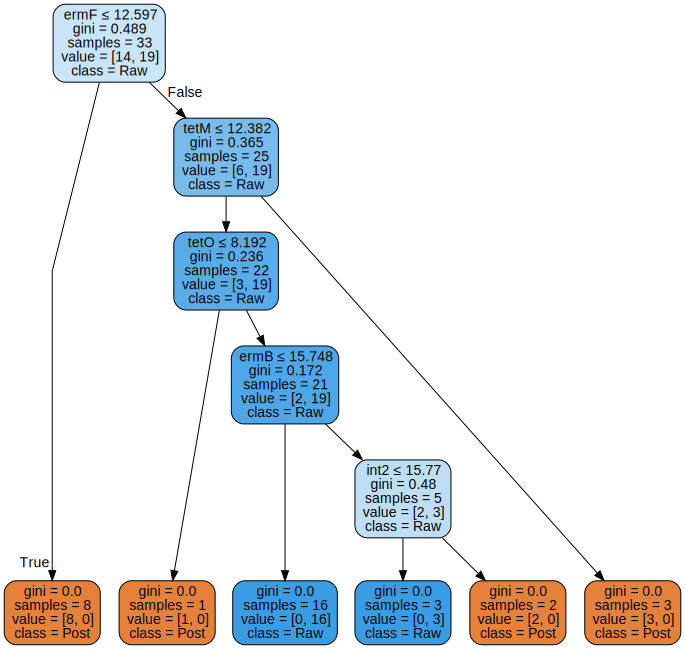

In [39]:
# Tree classifier to see the contributions

precisions = []
recalls = []
f1scores = []
supports = []
models = []
for k in range(100):
    x_train, x_test, y_train, y_test = train_test_split(data.iloc[0:, :12], data.index, test_size=0.3)
    model = tree.DecisionTreeClassifier(random_state = 0)
    y_pred = model.fit(x_train, y_train).predict(x_test)
    if k==0:
        cnf_matrix = confusion_matrix(y_test, y_pred)
    else:
        cnf_matrix = cnf_matrix + confusion_matrix(y_test, y_pred)
    performance = classification_report(y_test, y_pred )

    precision, recall, f1score, support = [i.split() for i in performance.split('\n') if len(i.split())>0][-1][-4:]
    precisions.append(precision)
    recalls.append(recall)
    f1scores.append(f1score)
    supports.append(support)
    models.append(model)
    
traces = [go.Box(y=i[0], name=i[1]) for i in [[precisions,'precision'], [recalls, 'recall'], [f1scores,'f1score'] ]]

print(performance)
display(iplot(traces))


display("Using the whole dataset to identify the relevant features:")
model = model.fit(data.iloc[:, :12], data.index)

display("Prediction using the whole dataset")
y_pred = model.predict(data.iloc[:, :12])
print(classification_report(data.index, y_pred ))

graph = ml_visualize(model=model, dataset=data.iloc[:, :12], _labels=["Post", "Raw"] )
display(graph)


,blaVEB,aac(6')-lb,aada2,ermB,ermF,sul1,sul2,tetO,tetA,tetM,int2,int1,Total Tetracyclines (ng/g),Lasalocid (LAS),Monensin (MON),Fe,Cu,Diflubenzuron Larvicide concentration (µg/kg)
samples,,,,,,,,,,,,,,,,,,
Post,13.022490,14.019723,13.996887,11.241327,10.153572,14.530170,11.450680,10.786182,0.000000,7.414557,17.311113,17.505467,0.000000,0.000000,1647.422953,354.670309,0.000000,0.000000
Post,12.070597,14.193917,12.857082,10.415167,10.199983,13.203723,11.872960,11.312847,0.000000,8.692132,19.391052,17.871763,778.300000,0.000000,4585.966265,780.534912,9.271397,0.000000
Post,14.654437,15.935220,13.068150,11.232950,10.364953,14.082283,11.382553,11.219360,0.000000,6.835187,17.564670,16.167410,264.200000,0.000000,3510.844091,1153.107287,17.115588,0.000000
Raw manure,0.000000,0.000000,0.000000,15.992767,17.368592,15.118422,10.612183,8.960433,14.741727,9.892863,14.862312,15.693083,0.000000,9.248141,1979.891081,172.473030,31.865790,0.000000
Raw manure,13.482918,15.152823,13.060190,14.393533,14.055253,10.917743,9.537623,11.820833,14.607240,9.721173,16.117717,18.361738,4892.100000,5.969815,2137.335823,721.024360,32.389540,0.000000
Raw manure,14.922602,15.816557,12.376532,13.641243,14.207007,10.945250,9.403137,11.822197,14.383012,9.838587,15.714107,16.423942,398.400000,5.198867,5171.595560,633.108500,32.497450,0.000000
Post,0.000000,0.000000,18.238613,0.000000,0.000000,10.750540,16.813710,16.737157,0.000000,17.580223,0.000000,16.968820,243.500000,0.000000,1823.616462,196.864910,35.109860,0.000000
Raw manure,13.639250,13.298150,14.948170,15.182277,14.608875,11.481793,9.436760,9.461310,13.632180,9.721820,15.449510,16.818110,0.000000,6.053915,1513.754324,931.134020,36.933060,0.000000
Raw manure,13.342482,0.000000,11.973857,11.413863,13.108300,9.694007,8.874347,12.082662,14.879452,9.109690,14.647640,15.708132,369.900000,0.000000,6168.829899,1114.360740,44.878620,0.000000
